In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
sns.set(style="white", color_codes=True)
%matplotlib inline 

In [2]:
# Get data from csv

In [3]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Create at least 3 plot 

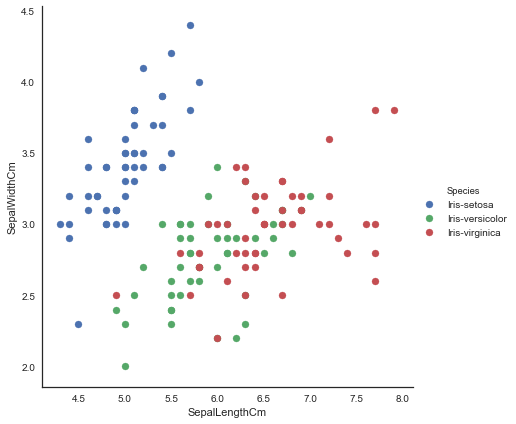

In [5]:
sns.FacetGrid(df, hue="Species", size=6) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

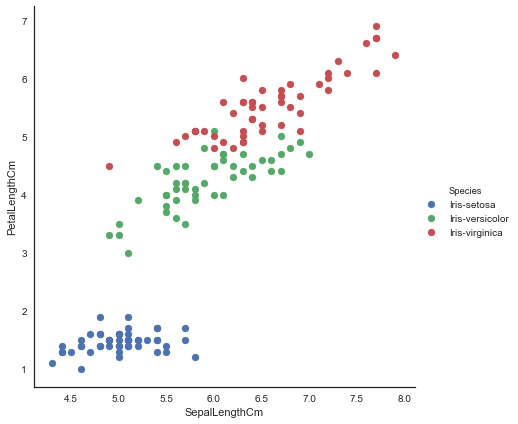

In [6]:
sns.FacetGrid(df, hue="Species", size=6) \
   .map(plt.scatter, "SepalLengthCm", "PetalLengthCm") \
   .add_legend()

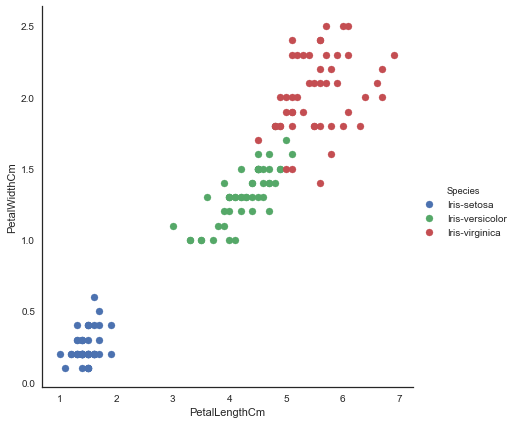

In [7]:
sns.FacetGrid(df, hue="Species", size=6) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()

In [8]:
# Preprocess the data 

In [9]:
X = df.drop(['Id','Species'], axis=1).as_matrix()
Y = df['Species'].as_matrix()

In [10]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [11]:
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

In [12]:
# Split the data to train and test

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state=37)

In [14]:
# Train the model

In [15]:
clf = SVC()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.94736842105263153

In [16]:
# Hyperparameter Tuning

In [17]:
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10,100]}
svc = SVC(probability=True)
grid = GridSearchCV(svc, parameters, cv=6)
grid.fit(x_train,y_train)


GridSearchCV(cv=6, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf', 'poly'), 'C': [1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [18]:
grid.best_score_

0.9732142857142857

In [19]:
grid.best_params_

{'C': 10, 'kernel': 'linear'}

In [20]:
clf = grid.best_estimator_
preds = clf.predict(x_test)
print("%",100*clf.score(x_test,y_test))

% 100.0


In [21]:
# Show the Evaluation metrics

In [22]:
matrix = confusion_matrix(y_test,preds)

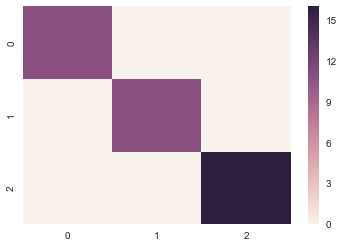

In [23]:
sns.heatmap(matrix)